In [2]:
import pandas as pd

# Load CSV file
data = pd.read_csv('Data/cloneData.csv')

# Display the first few rows of the dataset to analyze its structure
data.head()

,date,population,gdp,householdMinIncome,death,waste
0,2000,23494900,578739.953,4939,100707,13979399
1,2001,24030500,581735.947,5094,104531,14161131
2,2002,24542500,613097.264,5250,110367,14345225
3,2003,25038100,648586.394,5406,112744,14531713
4,2004,25541500,692582.849,5562,113192,14720625


In [3]:
# Convert 'date' to datetime format and set it as index
data['date'] = pd.to_datetime(data['date'], format='%Y')
data.set_index('date', inplace=True)

# Select the Waste column for prediction
waste_data = data['waste']

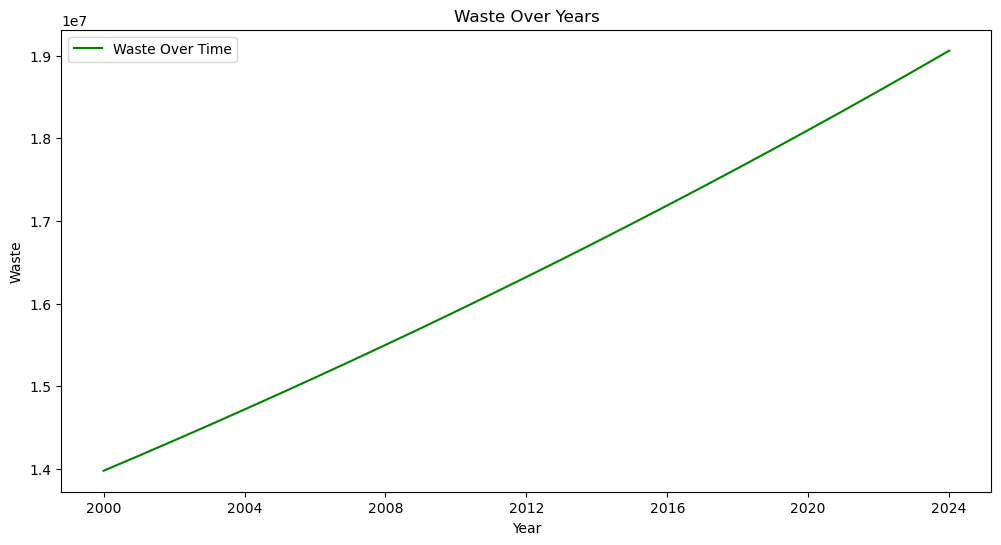

In [6]:
import matplotlib.pyplot as plt

# Plot the Waste data
plt.figure(figsize=(12, 6))
plt.plot(waste_data, label='Waste Over Time', color='green')
plt.title('Waste Over Years')
plt.xlabel('Year')
plt.ylabel('Waste')
plt.legend()
plt.show()

In [7]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(waste_data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: 2.6255912548223646
p-value: 0.999079451153147


In [8]:
# If the p-value is greater than 0.05, the series is non-stationary
waste_diff = waste_data.diff().dropna()

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

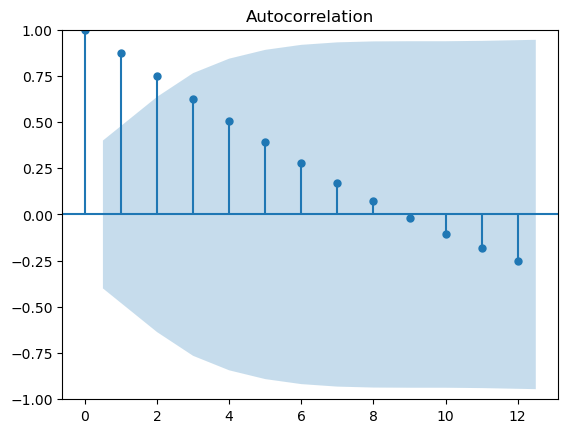

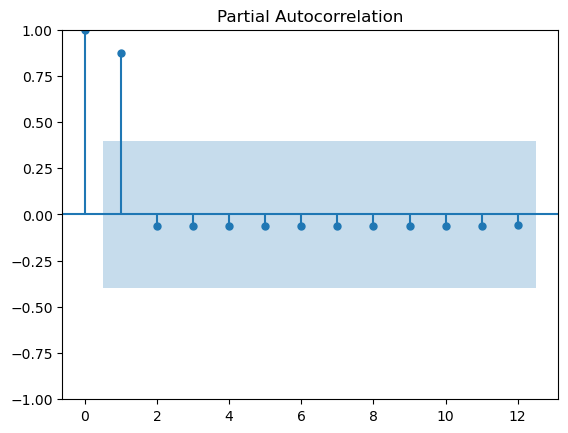

In [10]:
# Plot ACF and PACF to determine p and q
plot_acf(waste_diff)
plot_pacf(waste_diff)
plt.show()

In [12]:
# Fit the ARIMA model (example: ARIMA(1,1,1))
model = ARIMA(waste_data, order=(1, 1, 1))
model_fit = model.fit()


# Print the summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  waste   No. Observations:                   25
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -889227.277
Date:                Fri, 10 Jan 2025   AIC                        1778460.555
Time:                        15:03:57   BIC                        1778464.089
Sample:                    01-01-2000   HQIC                       1778461.492
                         - 01-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9868   4.49e-06    2.2e+05      0.000       0.987       0.987
ma.L1          0.6384   3.62e-05   1.76e+04      0.000       0.638       0.638
sigma2       171.4102      0.064   2658.296      0.0

c:\Users\Sukonbu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\Sukonbu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\Sukonbu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\Sukonbu\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Sukonbu\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelih

In [13]:
# Forecasting future values
forecast = model_fit.forecast(steps=5)  # Predicting for the next 5 years
print(forecast)

2025-01-01    1.930350e+07
2026-01-01    1.954412e+07
2027-01-01    1.978157e+07
2028-01-01    2.001588e+07
2029-01-01    2.024710e+07
Freq: YS-JAN, Name: predicted_mean, dtype: float64


C:\Users\Sukonbu\AppData\Local\Temp\ipykernel_11140\3383485438.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.plot(pd.date_range(start='2024', periods=5, freq='Y'), forecast, label='Forecasted Waste', color='red')


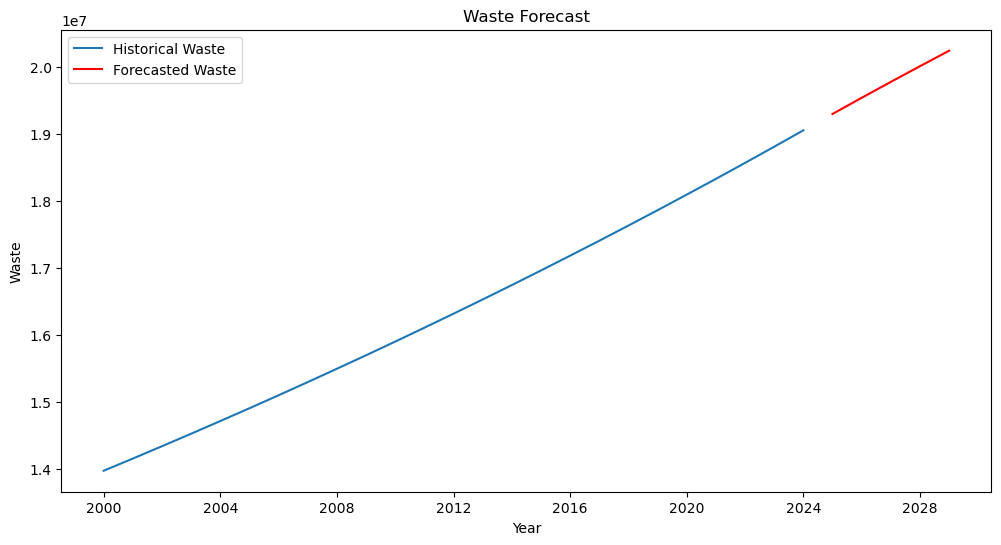

In [14]:
# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(waste_data, label='Historical Waste')
plt.plot(pd.date_range(start='2024', periods=5, freq='Y'), forecast, label='Forecasted Waste', color='red')
plt.title('Waste Forecast')
plt.xlabel('Year')
plt.ylabel('Waste')
plt.legend()
plt.show()

In [15]:
# Split the data into training and testing sets
train_size = int(len(waste_data) * 0.8)  # 80% for training
train, test = waste_data[0:train_size], waste_data[train_size:]

In [16]:
# Fit the ARIMA model on the training data
model = ARIMA(train, order=(1, 1, 1))  # Adjust p, d, q as necessary
model_fit = model.fit()

# Print the summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  waste   No. Observations:                   20
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -657011.211
Date:                Fri, 10 Jan 2025   AIC                        1314028.423
Time:                        15:04:34   BIC                        1314031.256
Sample:                    01-01-2000   HQIC                       1314028.902
                         - 01-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9875   3.66e-06    2.7e+05      0.000       0.987       0.987
ma.L1          0.1256   1.58e-05   7949.447      0.000       0.126       0.126
sigma2       323.8680      0.095   3398.370      0.0

c:\Users\Sukonbu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\Sukonbu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\Sukonbu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\Sukonbu\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Sukonbu\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invert

In [17]:
# Forecasting the test set
predictions = model_fit.forecast(steps=len(test))

In [18]:
# Calculate Mean Squared Error
mse = mean_squared_error(test, predictions)
print('Mean Squared Error:', mse)

Mean Squared Error: 2345905787.5019746


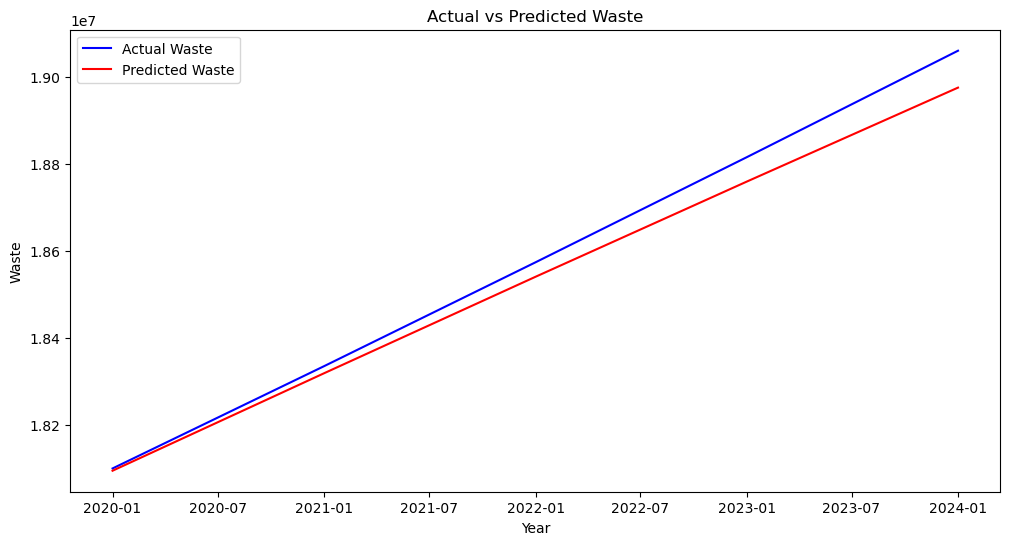

In [19]:
# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual Waste', color='blue')
plt.plot(test.index, predictions, label='Predicted Waste', color='red')
plt.title('Actual vs Predicted Waste')
plt.xlabel('Year')
plt.ylabel('Waste')
plt.legend()
plt.show()

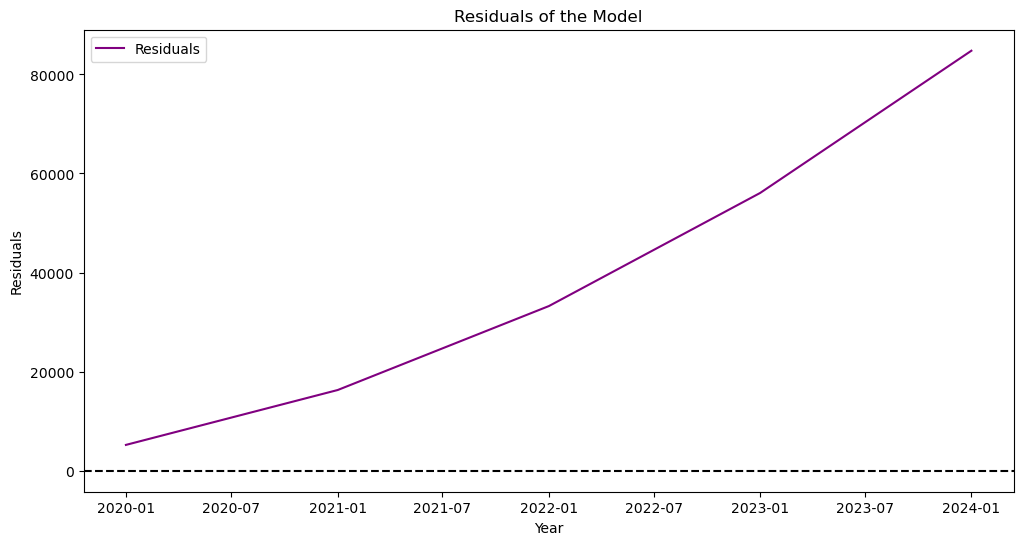

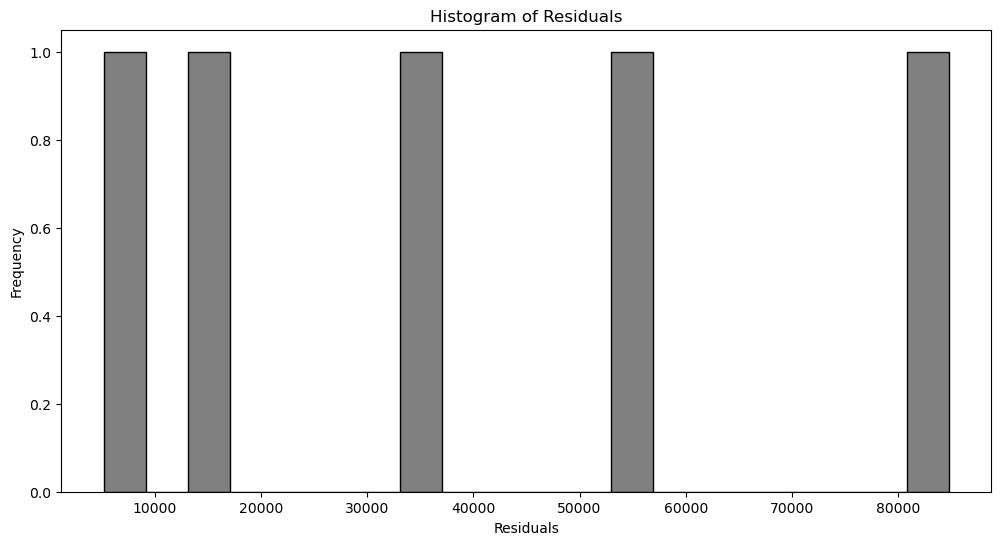

In [20]:
# Calculate residuals
residuals = test - predictions

# Plot residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals', color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals of the Model')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# Plot histogram of residuals
plt.figure(figsize=(12, 6))
plt.hist(residuals, bins=20, color='gray', edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [24]:
# Assuming 'predictions' are the predicted values and 'test' are the actual values

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test, predictions)
print('Mean Absolute Error (MAE):', mae)

# Calculate R² (Coefficient of Determination)
# R² = 1 - (SS_res / SS_tot)
ss_res = np.sum((test - predictions) ** 2)  # Residual sum of squares
ss_tot = np.sum((test - np.mean(test)) ** 2)  # Total sum of squares
r2 = 1 - (ss_res / ss_tot)
print('R²:', r2)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((test - predictions) / test)) * 100
print('Mean Absolute Percentage Error (MAPE):', mape)

Mean Absolute Error (MAE): 39119.97547120527
R²: 0.979624385357546
Mean Absolute Percentage Error (MAPE): 0.20789338807281804
